In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## University of California - Irvine
### Bank Marketing Data Set

### From UCI:
**Input variables:**

**bank client data:**
- 1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**
- 8 - contact: contact communication type (categorical: 'cellular','telephone') 
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
df_original=pd.read_csv("c:/data/bank-additional-full.csv",sep=';')
df_original=df_original.drop(['duration'],axis=1) # Per instructions from UC Irvine 
df_original.loc[df_original.pdays == 999, 'pdays'] = np.nan # 999 = No data from UCI.
df = df_original.copy()

print(df.shape)
display(df.head())

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Extend the DataFrame describe() method to show nunique, null counts and column type. 

In [3]:
def extended_describe(df):
    de = df.describe()

    nu = pd.DataFrame(df.nunique())
    nu.columns = ['nunique']
    nu = nu.transpose()

    nan = pd.DataFrame(df.isnull().sum(axis=0))
    nan.columns = ['nan']
    nan = nan.transpose()

    de = de.append([nu, nan], sort=False).transpose()
    de['categorical'] = de['count'].isnull()
    de.index.name = 'column'
    return de

In [4]:
de = extended_describe(df)
de

,count,mean,std,min,25%,50%,75%,max,nunique,nan,categorical
column,,,,,,,,,,,
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000,78.0,0.0,False
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000,42.0,0.0,False
pdays,1515.0,6.014521,3.824906,0.000,3.000,6.000,7.000,27.000,26.0,39673.0,False
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000,8.0,0.0,False
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,10.0,0.0,False
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767,26.0,0.0,False
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,26.0,0.0,False
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,316.0,0.0,False
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,11.0,0.0,False


In [5]:
numeric_columns = list(de.loc[de.categorical == False].reset_index()['column'])
categorical_columns = list(de.loc[de.categorical == True].reset_index()['column'])
# print(numeric_columns, categorical_columns)

## Outliers 
Looking at the 25th percentile and the min, as well as the 75th percentile and the max, the data does not have any extremes that we need to deal with. 
  
## Null Values 
Only pdays (days since last phone contact) has null values.  In the original dataset, this was set to 999, but was changed to nan after load.  The far majority of the values are null.   
  
### pdays 
The output variable is the column **y** (did the prospect sign up for a term deposit).  So, let's see if pdays has a significant correlation of to the output variable. 

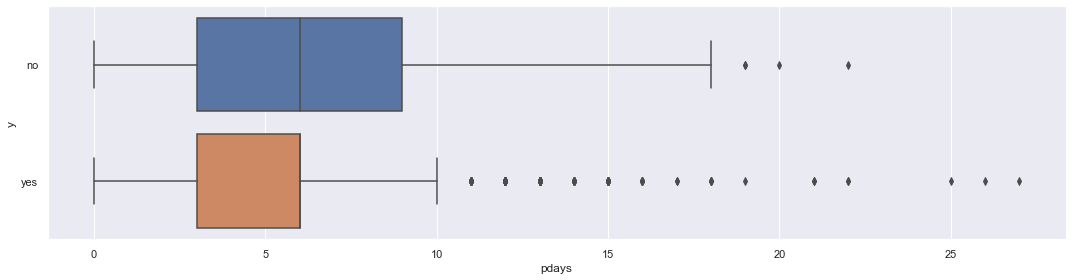

In [6]:
f = plt.figure(figsize=(15, 4))
sns.boxplot(x=df['pdays'], y=df['y'])
f.tight_layout()
plt.show()

The positive outcomes have a shorter **pdays** value.  So, let's keep the feature, but convert it to a categorical column and drop the numeric column. 

In [7]:
pdays_columns = ['no_contact', 'contact_0_5', 'contact_5_10', 'contact_10_15', 'contact_20']

df[pdays_columns[0]] = 0
df[pdays_columns[0]][df.pdays.isnull()] = 1

df[pdays_columns[1]] = 0
df[pdays_columns[1]][df.pdays <= 5] = 1

df[pdays_columns[2]] = 0
df[pdays_columns[2]][(df.pdays > 5) & (df.pdays <= 10)] = 1

df[pdays_columns[3]] = 0
df[pdays_columns[3]][(df.pdays > 15) & (df.pdays <= 20)] = 1

df[pdays_columns[4]] = 0
df[pdays_columns[4]][df.pdays > 20] = 1
                                     
df.drop('pdays', axis=1, inplace=True);
numeric_columns.remove('pdays')
categorical_columns = categorical_columns + pdays_columns

### Now let's look at the value counts for the categorical columns (sans dummies we just built). 

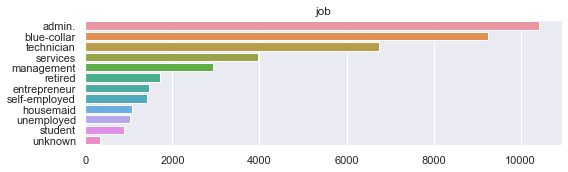

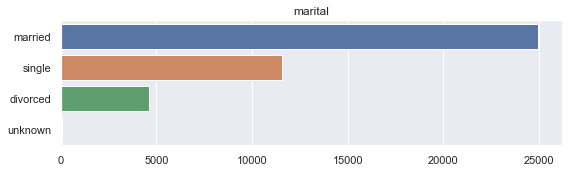

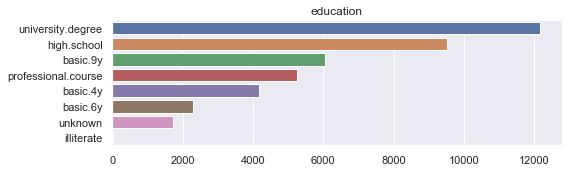

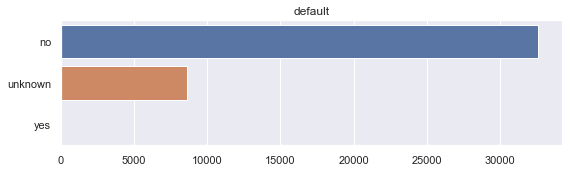

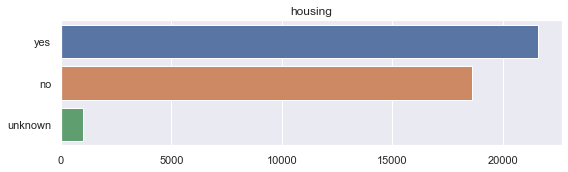

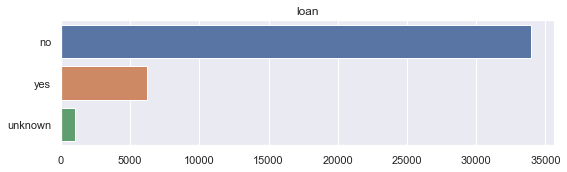

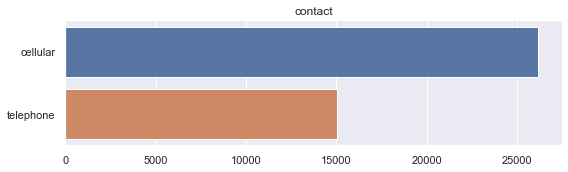

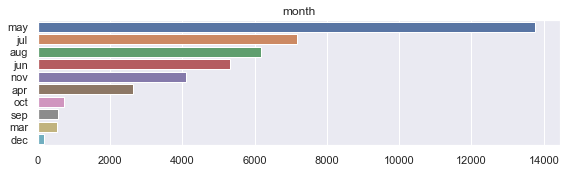

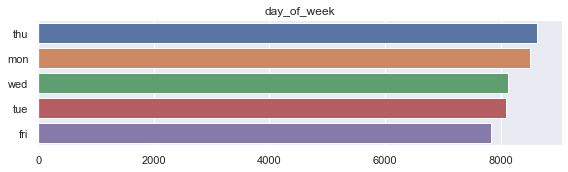

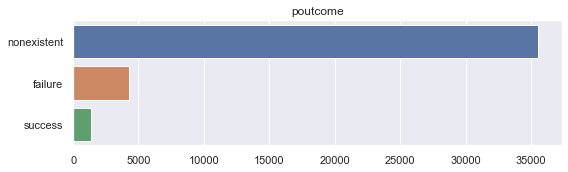

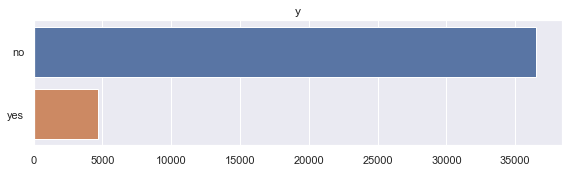

In [8]:
categorical_columns_sans_pdays = [c for c in categorical_columns if c not in pdays_columns]
for col in categorical_columns_sans_pdays:
    plt.figure(figsize=(8,2.5))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()   

### For numeric features, let's look at histograms. 

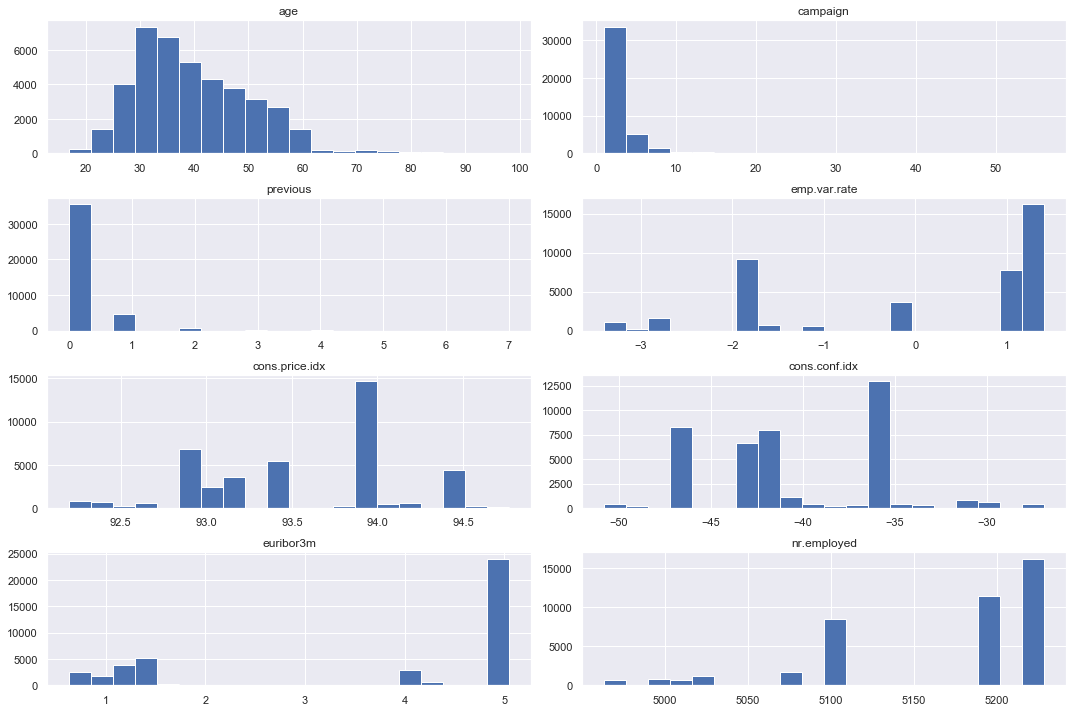

In [9]:
i = 0
j = 0
row_count = len(numeric_columns) // 2
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(row_count, 2)

for col in numeric_columns:
    ax = f.add_subplot(gs[i, j])
    ax.hist(df[col], bins=20)
    ax.set_title(col)
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

f.tight_layout()
plt.show()

### Build dummies for ML

In [10]:
df_clean = pd.get_dummies(df)

### Scale all features

In [11]:
def getScaledDataFrame(df):
    mms = MinMaxScaler()
    mms.fit(df)

    result = pd.DataFrame(mms.transform(df))
    result.columns = df.columns
    result.index = df.index
    return result

df_clean = getScaledDataFrame(df_clean)

## Clean and Scaled DataFrame

In [12]:
de = extended_describe(df_clean)
de

,count,mean,std,min,25%,50%,75%,max,nunique,nan,categorical
column,,,,,,,,,,,
age,41188.0,0.284248,0.128657,0.0,0.185185,0.259259,0.370370,1.0,78.0,0.0,False
campaign,41188.0,0.028502,0.050364,0.0,0.000000,0.018182,0.036364,1.0,42.0,0.0,False
previous,41188.0,0.024709,0.070700,0.0,0.000000,0.000000,0.000000,1.0,8.0,0.0,False
emp.var.rate,41188.0,0.725393,0.327283,0.0,0.333333,0.937500,1.000000,1.0,10.0,0.0,False
cons.price.idx,41188.0,0.535723,0.225581,0.0,0.340608,0.603274,0.698753,1.0,26.0,0.0,False
cons.conf.idx,41188.0,0.430854,0.193648,0.0,0.338912,0.376569,0.602510,1.0,26.0,0.0,False
euribor3m,41188.0,0.677237,0.393210,0.0,0.160961,0.957379,0.980957,1.0,316.0,0.0,False
nr.employed,41188.0,0.769134,0.273163,0.0,0.512287,0.859735,1.000000,1.0,11.0,0.0,False
no_contact,41188.0,0.963217,0.188230,0.0,1.000000,1.000000,1.000000,1.0,2.0,0.0,False


### Let's take a quick look at covariance between features

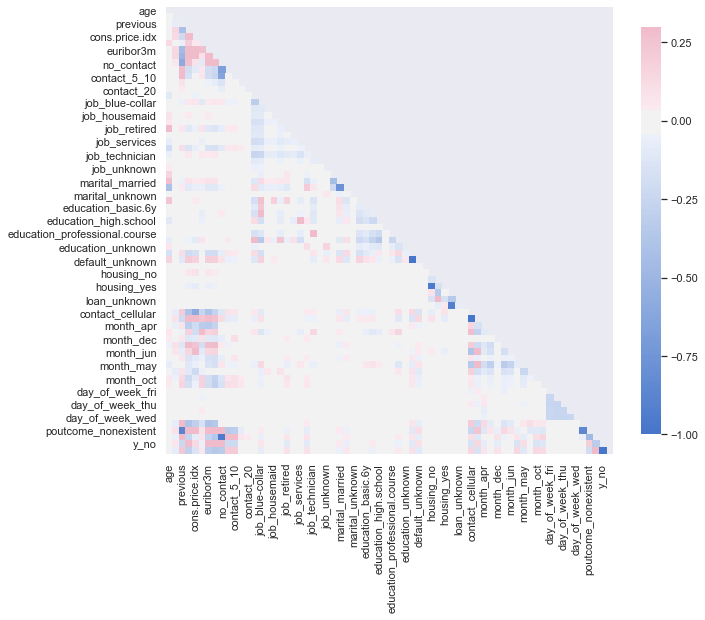

In [13]:
corr = df_clean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(255, 0, as_cmap=True)

f = plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, cbar_kws={"shrink": .75})

## Split into Train and Test

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, 
                               train_size=0.8, 
                               stratify=df_clean.y_yes.values, 
                               random_state=42)

print('Means of Positive Output Variable\nOriginal: {:.6f}\nTrain: {:.6f}\nTest: {:.6f}'.format(
                                                                                (df_clean.y_yes).mean(), 
                                                                                (train.y_yes).mean(),
                                                                                (test.y_yes).mean()))
print('\nRowCounts\nTrain: {:,}\nTest: {:,}'.format(len(train), len(test)))

feature_columns = df_clean.columns[0:len(df_clean.columns) - 2] #Remove both y_yes and y_no
x_train = train[feature_columns].copy()
y_train = train['y_yes'].copy()
x_test = test[feature_columns].copy()
y_test = test['y_yes'].copy()

Means of Positive Output Variable
Original: 0.112654
Train: 0.112656
Test: 0.112649

RowCounts
Train: 32,950
Test: 8,238


# Logistic Regression 
Our goal is to use Random Forest, but it still makes sense to take a quick look at Logistic Regression.  This will give us a target goal for RF to exceed.

In [15]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 42, solver='saga')
logit.fit(x_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

### Let's look at the top features that influenced our mode

In [16]:
print('Intercept: ', logit.intercept_)
de = pd.DataFrame({'column':feature_columns, 'model_slope':logit.coef_[0].transpose()})
de.reindex(de.model_slope.abs().sort_values().index)
de.loc[(de.model_slope.abs()).sort_values(ascending=False).index][['column', 'model_slope']].head(10)

Intercept:  [0.30352623]


,column,model_slope
3,emp.var.rate,-5.121358
4,cons.price.idx,3.630040
1,campaign,-2.101094
53,month_mar,1.192887
8,no_contact,-1.182903
11,contact_10_15,-0.891651
6,euribor3m,0.857024
2,previous,-0.624828
54,month_may,-0.603397
12,contact_20,0.585148


### Use our Logistic Regression model to predict on our test data. 

In [17]:
y_pred = logit.predict(x_test)

Let's display the Confusion Matrics in a way that show the meaning of the 4 values. 

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
TN = int(confusion_matrix[0,0])
FP = int(confusion_matrix[0,1])
FN = int(confusion_matrix[1,0])
TP = int(confusion_matrix[1,1])
str_cm = [
            ['TN: {:,}'.format(TN), 'FP: {:,}'.format(FP)],
            ['FN: {:,}'.format(FN), 'TP: {:,}'.format(TP)]
         ] 
pd.DataFrame(str_cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,"TN: 6,978",FP: 332
Actual Positive,FN: 550,TP: 378


#### We could use SKLearn to do this, but let's get the TPR and FPA manfully as an exercise. 

In [19]:
test_count = confusion_matrix.sum()
success_count = int(confusion_matrix[0,0]) + int(confusion_matrix[1,1])
accuracy = success_count / test_count
TPR = TP / (TP + FN)
FPR = FN / (FN + TP)
# print('Accuracy: {:%}'.format(metrics.accuracy_score(y_test, y_pred)))
# print('Sensitivity (TPR): {:%}'.format(metrics.recall_score(y_test, y_pred)))
print('Accuracy: {:%}'.format(accuracy))
print('Sensitivity (TPR): {:%}'.format(TPR))
print('FPR: {:%}'.format(FPR))

Accuracy: 89.293518%
Sensitivity (TPR): 40.732759%
FPR: 59.267241%


### ROC Curve for out Logistic Regession

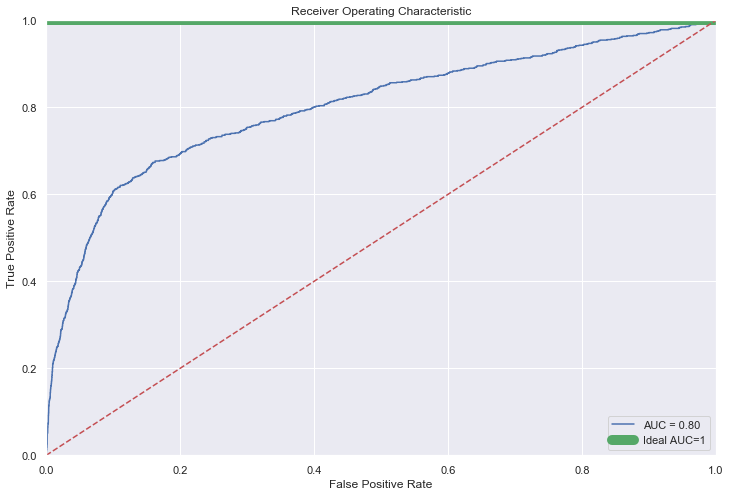

In [20]:
y_pred_proba = logit.predict_proba(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

f = plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ideal_x = list(range(len(fpr)))
ideal_y = [1] * len(tpr)
plt.plot(ideal_x, ideal_y, 'b', label = 'Ideal AUC=1', color='g', linewidth=10)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ideal predictive model would have reached 100% sensitivity with 0% False Positives.  So the ideal curve would stay at 1 and the area under the curve $ \int_{0}^{1} y(x) dx = 1 $ 
  
The Logistic Regression curve obtains **80%** of the ideal area.  Looking at the curve, you can see that TPR raises fairly fast, but around TPR = 60%, gains in TRP come at the expense of False Positives. 
  
Let's see if Random Forest can do better. 